### Passo a Passo de um Projeto de Ciência de Dados

- Passo 1: Entendimento do Desafio
- Passo 2: Entendimento da Área/Empresa
- Passo 3: Extração/Obtenção de Dados
- Passo 4: Ajuste de Dados (Tratamento/Limpeza)
- Passo 5: Análise Exploratória
- Passo 6: Modelagem + Algoritmos (Aqui que entra a Inteligência Artificial, se necessário)
- Passo 7: Interpretação de Resultados

# Projeto Ciência de Dados - Previsão de Vendas

- Conseguir prever as vendas em determinado período com base nos gastos em anúncios em cada veiculo de comunicação: TV, Jornal e Rádio
- TV, Jornal e Rádio estão em milhares de reais
- Vendas está em milhões

#### Importar a Base de dados

In [1]:
# Instalando as bibliotecas utilizadas para o projeto

!pip install matplotlib
!pip install seaborn
!pip install scikit-learn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [21]:
# Importando as bibliotecas utilizadas no projeto
import pandas as pd
import io
from google.colab import files 
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics
  



In [44]:
# Fazendo Upload do Dataframe utilizado no projeto

uploaded = files.upload()

tabela = pd.read_csv(io.BytesIO(uploaded['prop-e-publi.csv']))  #Dataframe utilizado no projeto


Saving prop-e-publi.csv to prop-e-publi (4).csv


In [45]:
# A tabela informa o volume de dinheiro investido em cada veiculo de massa (TV, Rádio e Jornal) e o total de Vendas
display(tabela)

,TV,Radio,Jornal,Vendas
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9
...,...,...,...,...
195,38.2,3.7,13.8,7.6
196,94.2,4.9,8.1,14.0
197,177.0,9.3,6.4,14.8
198,283.6,42.0,66.2,25.5


#### Análise Exploratória


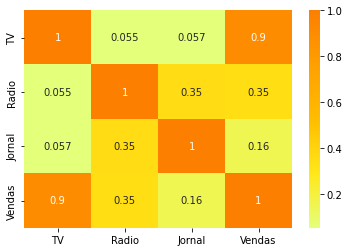

In [19]:
# Mapa de Calor com o dados para entender a correlação entre as informações

sns.heatmap(tabela.corr(), annot=True, cmap="Wistia")
plt.show()


#### Preparação dos dados para treinarmos Modelo de Machine Learning


In [49]:
# Separar dados em X e Y e treino e teste

y = tabela["Vendas"] # quem iremos prever
x = tabela.drop("Vendas", axis=1) #tabela excluidos os dados que queremos prever

x_treino, x_teste, y_treino, y_teste = train_test_split(x, y, test_size=0.2) #reservado 20% da base para teste 80% treino


#### Modelos de Inteligencia Artificial que vamos usar:

- Regressão Linear
- RandomForest (Árvore de Decisão)

In [31]:
# cria as inteligencias aritificiais
modelo_regressaolinear = LinearRegression()
modelo_arvoredecisao = RandomForestRegressor()

# treina as inteligencias artificias
modelo_regressaolinear.fit(x_treino, y_treino)
modelo_arvoredecisao.fit(x_treino, y_treino)

RandomForestRegressor()

#### Teste da IA e Avaliação do Melhor Modelo

- Vamos usar o R² -> diz o % que o nosso modelo consegue explicar o que acontece

In [38]:
# criar as previsoes
previsao_regressaolinear = modelo_regressaolinear.predict(x_teste)
previsao_arvoredecisao = modelo_arvoredecisao.predict(x_teste)

# comparar os modelos
# print(metrics.r2_score(y_teste, previsao_regressaolinear))
# print(metrics.r2_score(y_teste, previsao_arvoredecisao))  

# abaixo os outputs são formatados para serem exibidos em %
print(f"Regressão Linear, acuracidade: {metrics.r2_score(y_teste, previsao_regressaolinear):.2%}")
print(f"Arvore de Decisão, acuracidade: {metrics.r2_score(y_teste, previsao_arvoredecisao):.2%}")  

Regressão Linear, acuracidade: 88.19%
Arvore de Decisão, acuracidade: 94.93%


#### Visualização Gráfica das Previsões

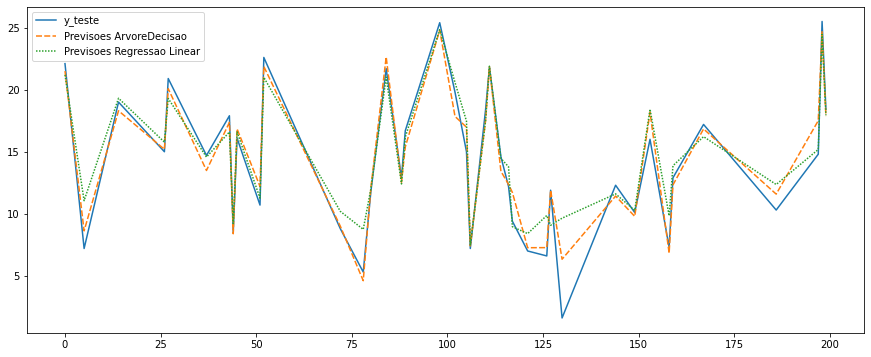

In [39]:
# O gráfico serve para visualizar como cada método fica mais próximo da situação real

tabela_auxiliar = pd.DataFrame()
tabela_auxiliar["y_teste"] = y_teste
tabela_auxiliar["Previsoes ArvoreDecisao"] = previsao_arvoredecisao
tabela_auxiliar["Previsoes Regressao Linear"] = previsao_regressaolinear

plt.figure(figsize=(15,6))
sns.lineplot(data=tabela_auxiliar)
plt.show()

#### Pegando uma nova fonte de dados para fazer previsão a partir da entreda de dados


In [41]:
uploaded = files.upload()

novos_valores = pd.read_csv(io.BytesIO(uploaded['novos_valores.csv']))  #Dataframe com valores para fazermos as previsões


Saving novos_valores.csv to novos_valores (1).csv


In [42]:
display(novos_valores)

,TV,Radio,Jornal
0,23.1,3.8,69.2
1,44.5,0.0,5.1
2,170.2,45.9,0.0


In [46]:
# o modelo utilizado para as novas previsões sera o de Arvore de Decisão pois este mostrou maior acuracidade
previsao = modelo_arvoredecisao.predict(novos_valores)
print(previsao)

[ 7.384  8.417 20.513]


#### Qual a importância de cada variável para as vendas?

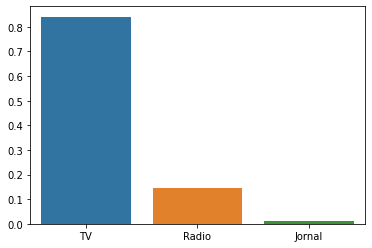

In [48]:
sns.barplot(x=x_treino.columns, y=modelo_arvoredecisao.feature_importances_)
plt.show()
